In [ ]:
import torch
import torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import lpips
import numpy as np

from dcgan import Generator, Discriminator
from easydict import EasyDict as edict

In [ ]:
device = "cuda:1"
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(64),
    torchvision.transforms.CenterCrop(64),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]),
])
dataset = torchvision.datasets.ImageFolder("./dataset/celeba", transform = transforms)




# gan_training samples가 8192, 16384, 32768일때를 비교(M=100, batch=50)

# #training samples=8192일 때

In [ ]:
param_dir_8192 = "./gen_8192_20000.pt"
g_8192 = Generator()
g_8192.load_state_dict(torch.load(param_dir_8192, map_location = device))
g_8192.eval().to(device)

Generator(
  (layer1): GenBlock(
    (conv): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1))
    (bn): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer2): GenBlock(
    (conv): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer3): GenBlock(
    (conv): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer4): GenBlock(
    (conv): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer5): Sequential(
    (0): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1)

In [ ]:
distance = lpips.LPIPS(net = 'vgg')
distance.eval().to('cpu')

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/guest/.local/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth


LPIPS(
  (scaling_layer): ScalingLayer()
  (net): vgg16(
    (slice1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (slice2): Sequential(
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
    )
    (slice3): Sequential(
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, 

In [ ]:
M=100
train_img = []
non_train_img = []
for i in range(M):
    img = dataset.__getitem__(i)[0].unsqueeze(0).to(device)
    train_img.append(img)
for i in range(M):
    img = dataset.__getitem__(40000+i)[0].unsqueeze(0).to(device)
    non_train_img.append(img)

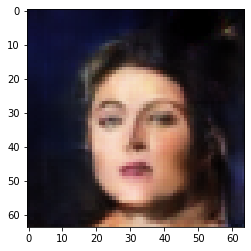

In [ ]:
plt.imshow((generated_data[0][3].detach().cpu().numpy().squeeze().transpose(1,2,0)+1)/2)

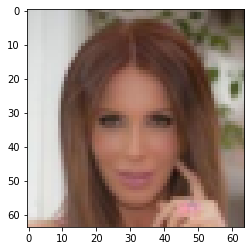

In [ ]:
plt.imshow((non_train_img[3].detach().cpu().numpy().squeeze().transpose(1,2,0)+1)/2)

In [ ]:
#train_img = [img.to(device) for img in train_img]

In [ ]:
distance(train_img[1].squeeze().cpu(), generated_data[0][5].squeeze().cpu())

tensor([[[[0.5606]]]], grad_fn=<AddBackward0>)

In [ ]:
#def minimum_distance(img):
#    distances = []
#    for i in range(N):
#        distances.append(distance(generated_data[0][i].cpu(),img))
#    return min(distances)

In [ ]:
minimum_distance(train_img[1].cpu()).min()


tensor(0.4512, grad_fn=<MinBackward1>)

In [ ]:

distances = []
for i in range(N):
    distances.append(distance(generated_data[0][i].cpu(), non_train_img[5].cpu()))
print(distances)
print(min(distances))


[tensor([[[[0.5306]]]], grad_fn=<AddBackward0>), tensor([[[[0.5909]]]], grad_fn=<AddBackward0>), tensor([[[[0.5407]]]], grad_fn=<AddBackward0>), tensor([[[[0.5380]]]], grad_fn=<AddBackward0>), tensor([[[[0.5576]]]], grad_fn=<AddBackward0>), tensor([[[[0.4874]]]], grad_fn=<AddBackward0>), tensor([[[[0.5845]]]], grad_fn=<AddBackward0>), tensor([[[[0.5771]]]], grad_fn=<AddBackward0>), tensor([[[[0.4893]]]], grad_fn=<AddBackward0>), tensor([[[[0.5029]]]], grad_fn=<AddBackward0>)]
tensor([[[[0.4874]]]], grad_fn=<AddBackward0>)


In [ ]:
print(minimum_distance(train_img[6].cpu()).min())
print(minimum_distance(non_train_img[3].cpu()).min())

tensor(0.4235, grad_fn=<MinBackward1>)
tensor(0.4008, grad_fn=<MinBackward1>)


In [ ]:
device = "cuda:0"

distance = lpips.LPIPS(net = 'vgg')
distance.eval().to(device)

param_dir_8192 = "./gen_8192_20000.pt"
g_8192 = Generator()
g_8192.load_state_dict(torch.load(param_dir_8192, map_location = device))
g_8192.eval().to(device)



Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/guest/.local/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth


Generator(
  (layer1): GenBlock(
    (conv): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1))
    (bn): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer2): GenBlock(
    (conv): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer3): GenBlock(
    (conv): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer4): GenBlock(
    (conv): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer5): Sequential(
    (0): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1)

In [ ]:
def minimum_distance(img):
    distances = []

    for i in range(N_batch):
        distances.append(distance(generated_data[i], img).min())

    return min(distances)

In [ ]:
import time
rgs=set(range(200))
batch=50
acc_8192=[]
times_8192=[]
Ns=list(range(100,2501,100))

for N in range(100,2501,100):
    start = time.time()
    generated_data = []
    N_batch=int(N/batch)
    print(N_batch)
    for i in range(N_batch):
        z= torch.randn((batch, 100, 1, 1) , device = device)
        with torch.no_grad():
            img = g_8192(z)
        generated_data.append(img)
    mini_eps = []
    for t in range(M):
        with torch.no_grad():
            mini_eps.append(minimum_distance(train_img[t].to(device)))
            mini_eps.append(minimum_distance(non_train_img[t].to(device)))
    mini_eps_tensor = torch.stack(mini_eps)
    epsilon = torch.median(mini_eps_tensor)
    print(epsilon)
    nbds = []
    nbds_train=[]
    nbds_non_train=[]
    for i in range(M):
        neighbors = 0

        for k in range(N_batch):
#             if distance(train_img[i].cpu(),generated_data[0][k].cpu()) <= epsilon:
#                 neighbors += 1
            neighbors += (distance(train_img[i].to(device), generated_data[k]) <= epsilon).sum().item()
        nbds.append(neighbors)
        nbds_train.append(neighbors)
    for l in range(M):
        nt_neighbors = 0
        for j in range(N_batch):
            nt_neighbors += (distance(non_train_img[l].to(device), generated_data[j]) <= epsilon).sum().item()
#             if distance(non_train_img[l].cpu(),generated_data[0][j].cpu()) <= epsilon:
#                 nt_neighbors +=1
        nbds.append(nt_neighbors)
        nbds_non_train.append(nt_neighbors)
    nbds_tensor=torch.tensor(nbds)
    max_values, max_indices=torch.topk(nbds_tensor, k=M)
    max_nbds=[nbds_tensor[index] for index in max_indices]
    max_nbds=torch.stack(max_nbds)
    print(max_nbds)
    # TP, 즉 max_indices(참이라고 예측) 중에서 실제로 index가 M 미만(참)인 것들.
    TP=0
    for index in max_indices:
        if index<M:
            TP+=1
    ## 여기서부터 recall 계산
    max_ind_list=[]
    #for i in range(100):
    #    max_ind_list.append(max_indices[i].item())
    #non_max_idx=list(rgs-set(max_ind_list))
    accuracy=TP/M
    print('TP: {0}'.format(TP))
    acc_8192.append(accuracy)
    #Ns.append(N)
    print(N/100)
    end = time.time()
    print(f"{end - start:.5f} sec")
    times_8192.append(end - start)
print(acc_8192)
print(times_8192)
plt.figure(figsize = (16,12))
plt.title("#Train=8192: B=50 / M=100 / N:100-2500 by 100", fontsize = 20)
plt.plot(Ns, acc_8192,'bo-')
plt.xlabel("N", fontsize = 20)
plt.ylabel("acc", fontsize = 20)
plt.xticks(Ns,fontsize = 10)
plt.yticks(fontsize = 10)
    #label = "{:.2f}".format(y) # y좌표를 소수점 이하 2자리까지를 문자열로 만듬.
# xs와 ys로부터 하나씩 가져와서 묶은 후, 각각 x,y에 전달합니다.
for x,y in zip(Ns,acc_8192):


    plt.annotate(y, # 출력할 텍스트, 여기에선 y좌표
                (x,y), # 텍스트를 출력할 좌표
                textcoords="offset points", # 텍스트 위치를 (x,y)로 부터의 오프셋 (offset_x, offset_y)로 지정
                xytext=(0, 20), # (x, y)로 부터의 오프셋 (offset_x, offset_y), 여기에선 y 좌표로 +20 이동합니다.
                ha='center') # 수평방향으로 중앙정렬합니다.

# 화면에 출력합니다.
plt.show()


2
tensor(0.3885, device='cuda:0')
tensor([19, 17, 15, 15, 15, 14, 12, 12, 12, 12, 12, 11, 11, 11, 10, 10, 10,  9,
         8,  8,  8,  8,  8,  8,  8,  8,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,
         5,  5,  5,  5,  5,  5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1])
TP: 57
1.0
11.37985 sec
4
tensor(0.3782, device='cuda:0')
tensor([37, 32, 32, 29, 26, 23, 23, 22, 21, 21, 18, 17, 16, 16, 15, 15, 15, 15,
        15, 14, 14, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 11, 11, 10, 10, 10,
        10,  9,  9,  8,  7,  7,  6,  6,  6,  6,  6,  6,  5,  5,  5,  5,  5,  5,
         4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,
         2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1])
TP: 56
2.0

# 오류가 생긴 관계로 acc_8192를 표로 따로 출력함

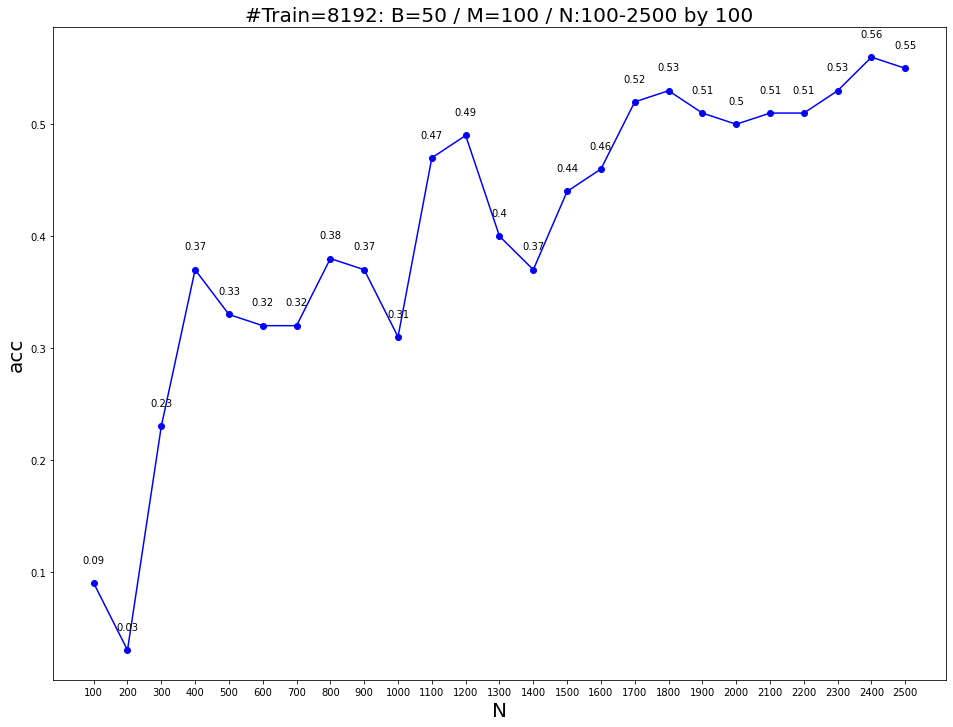

In [ ]:
acc_8192=[0.09, 0.03, 0.23, 0.37, 0.33, 0.32, 0.32, 0.38, 0.37, 0.31, 0.47, 0.49, 0.4, 0.37, 0.44, 0.46, 0.52, 0.53, 0.51, 0.5, 0.51, 0.51, 0.53, 0.56, 0.55]
plt.figure(figsize = (16,12))
plt.title("#Train=8192: B=50 / M=100 / N:100-2500 by 100", fontsize = 20)
plt.plot(Ns, acc_8192,'bo-')
plt.xlabel("N", fontsize = 20)
plt.ylabel("acc", fontsize = 20)
plt.xticks(Ns,fontsize = 10)
plt.yticks(fontsize = 10)
    #label = "{:.2f}".format(y) # y좌표를 소수점 이하 2자리까지를 문자열로 만듬.
# xs와 ys로부터 하나씩 가져와서 묶은 후, 각각 x,y에 전달합니다.
for x,y in zip(Ns,acc_8192):


    plt.annotate(y, # 출력할 텍스트, 여기에선 y좌표
                (x,y), # 텍스트를 출력할 좌표
                textcoords="offset points", # 텍스트 위치를 (x,y)로 부터의 오프셋 (offset_x, offset_y)로 지정
                xytext=(0, 20), # (x, y)로 부터의 오프셋 (offset_x, offset_y), 여기에선 y 좌표로 +20 이동합니다.
                ha='center') # 수평방향으로 중앙정렬합니다.

# 화면에 출력합니다.
plt.show()


# #training samples=16384일 때

In [ ]:
param_dir_16384 = "./gen_16384_20000.pt"
g_16384 = Generator()
g_16384.load_state_dict(torch.load(param_dir_16384, map_location = device))
g_16384.eval().to(device)

Generator(
  (layer1): GenBlock(
    (conv): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1))
    (bn): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer2): GenBlock(
    (conv): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer3): GenBlock(
    (conv): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer4): GenBlock(
    (conv): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer5): Sequential(
    (0): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1)

2
tensor(0.4031)
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
TP: 6
1.0
82.96000 sec
4
tensor(0.4010)
tensor([2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
TP: 15
2.0
88.95378 sec
6
tensor(0.3927)
tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

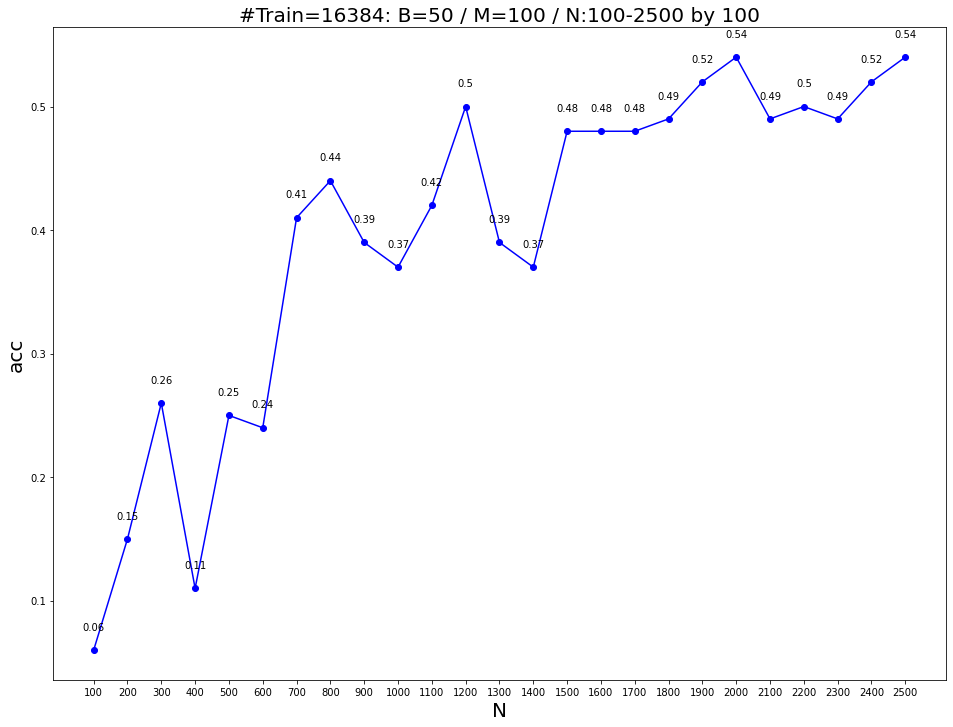

In [ ]:
rgs=set(range(200))
batch=50
acc_16384=[]
times_16384=[]
#Ns=list(range(100,2501,100))
for N in range(100,2501,100):
    start = time.time()
    generated_data = []
    N_batch=int(N/batch)
    print(N_batch)
    for i in range(N_batch):
        z= torch.randn((batch, 100, 1, 1) , device = device)
        with torch.no_grad():
            img = g_16384(z)
        generated_data.append(img)
    mini_eps = []
    for t in range(M):
        with torch.no_grad():
            mini_eps.append(minimum_distance(train_img[t].cpu()).min())
            mini_eps.append(minimum_distance(non_train_img[t].cpu()).min())
    mini_eps_tensor = torch.stack(mini_eps)
    epsilon = torch.median(mini_eps_tensor)
    print(epsilon)
    nbds = []
    nbds_train=[]
    nbds_non_train=[]
    for i in range(M):
        neighbors = 0

        for k in range(N_batch):
            if distance(train_img[i].cpu(),generated_data[0][k].cpu()) <= epsilon:
                neighbors += 1
        nbds.append(neighbors)
        nbds_train.append(neighbors)
    for l in range(M):
        nt_neighbors = 0
        for j in range(N_batch):
            if distance(non_train_img[l].cpu(),generated_data[0][j].cpu()) <= epsilon:
                nt_neighbors +=1
        nbds.append(nt_neighbors)
        nbds_non_train.append(nt_neighbors)
    nbds_tensor=torch.tensor(nbds)
    max_values, max_indices=torch.topk(nbds_tensor, k=M)
    max_nbds=[nbds_tensor[index] for index in max_indices]
    max_nbds=torch.stack(max_nbds)
    print(max_nbds)
    # TP, 즉 max_indices(참이라고 예측) 중에서 실제로 index가 M 미만(참)인 것들.
    TP=0
    for index in max_indices:
        if index<M:
            TP+=1
    ## 여기서부터 recall 계산
    max_ind_list=[]
    #for i in range(100):
    #    max_ind_list.append(max_indices[i].item())
    #non_max_idx=list(rgs-set(max_ind_list))
    accuracy=TP/M
    print('TP: {0}'.format(TP))
    acc_16384.append(accuracy)
    #Ns.append(N)
    print(N/100)
    end = time.time()
    print(f"{end - start:.5f} sec")
    times_16384.append(end - start)
print(acc_16384)
print(times_16384)
plt.figure(figsize = (16,12))
plt.title("#Train=16384: B=50 / M=100 / N:100-2500 by 100", fontsize = 20)
plt.plot(Ns, acc_16384,'bo-')
plt.xlabel("N", fontsize = 20)
plt.ylabel("acc", fontsize = 20)
plt.xticks(Ns,fontsize = 10)
plt.yticks(fontsize = 10)
    #label = "{:.2f}".format(y) # y좌표를 소수점 이하 2자리까지를 문자열로 만듬.
# xs와 ys로부터 하나씩 가져와서 묶은 후, 각각 x,y에 전달합니다.
for x,y in zip(Ns,acc_16384):


    plt.annotate(y, # 출력할 텍스트, 여기에선 y좌표
                (x,y), # 텍스트를 출력할 좌표
                textcoords="offset points", # 텍스트 위치를 (x,y)로 부터의 오프셋 (offset_x, offset_y)로 지정
                xytext=(0, 20),
                ha='center') # 수평방향으로 중앙정렬합니다.

# 화면에 출력합니다.
plt.show()


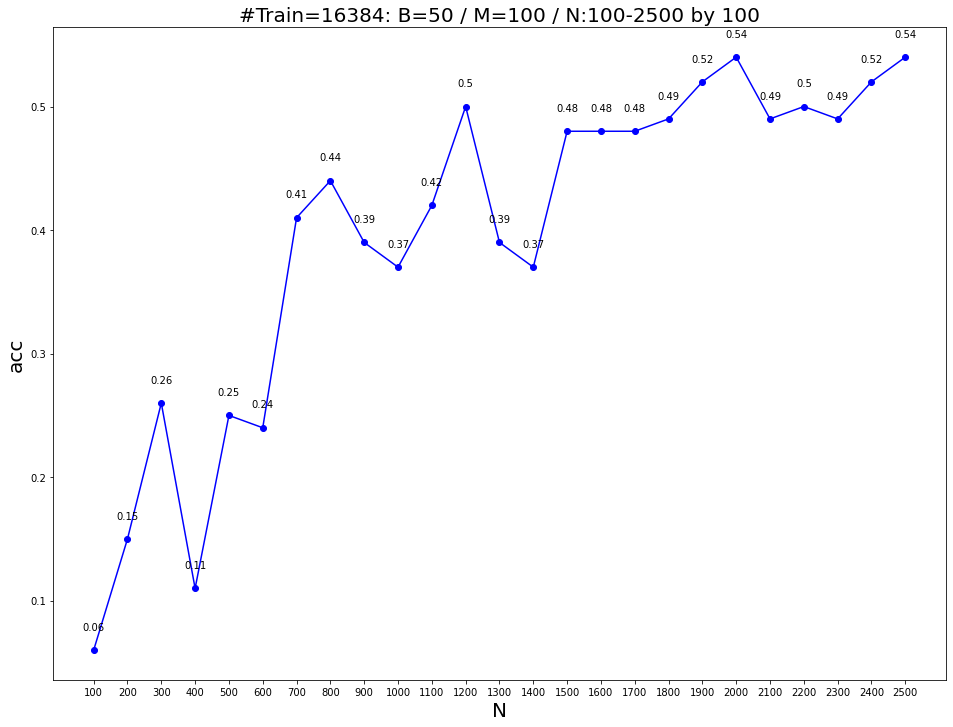

In [ ]:
Ns=list(range(100,2510,100))
acc_16384=[0.06, 0.15, 0.26, 0.11, 0.25, 0.24, 0.41, 0.44, 0.39, 0.37, 0.42, 0.5, 0.39, 0.37, 0.48, 0.48, 0.48, 0.49, 0.52, 0.54, 0.49, 0.5, 0.49, 0.52, 0.54]
plt.figure(figsize = (16,12))
plt.title("#Train=16384: B=50 / M=100 / N:100-2500 by 100", fontsize = 20)
plt.plot(Ns, acc_16384,'bo-')
plt.xlabel("N", fontsize = 20)
plt.ylabel("acc", fontsize = 20)
plt.xticks(Ns,fontsize = 10)
plt.yticks(fontsize = 10)
    #label = "{:.2f}".format(y) # y좌표를 소수점 이하 2자리까지를 문자열로 만듬.
# xs와 ys로부터 하나씩 가져와서 묶은 후, 각각 x,y에 전달합니다.
for x,y in zip(Ns,acc_16384):


    plt.annotate(y, # 출력할 텍스트, 여기에선 y좌표
                (x,y), # 텍스트를 출력할 좌표
                textcoords="offset points", # 텍스트 위치를 (x,y)로 부터의 오프셋 (offset_x, offset_y)로 지정
                xytext=(0, 20), # (x, y)로 부터의 오프셋 (offset_x, offset_y), 여기에선 y 좌표로 +20 이동합니다.
                ha='center') # 수평방향으로 중앙정렬합니다.

# 화면에 출력합니다.
plt.show()

# #training samples=32768일 때

In [ ]:
param_dir_32768 = "./gen_32768_20000.pt"
g_32768 = Generator()
g_32768.load_state_dict(torch.load(param_dir_32768, map_location = device))
g_32768.eval().to(device)

Generator(
  (layer1): GenBlock(
    (conv): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1))
    (bn): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer2): GenBlock(
    (conv): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer3): GenBlock(
    (conv): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer4): GenBlock(
    (conv): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU()
  )
  (layer5): Sequential(
    (0): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1)

2
tensor(0.4064)
tensor([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
TP: 1
1.0
77.80275 sec
4
tensor(0.3953)
tensor([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
TP: 11
2.0
80.72559 sec
6
tensor(0.4065)
tensor([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

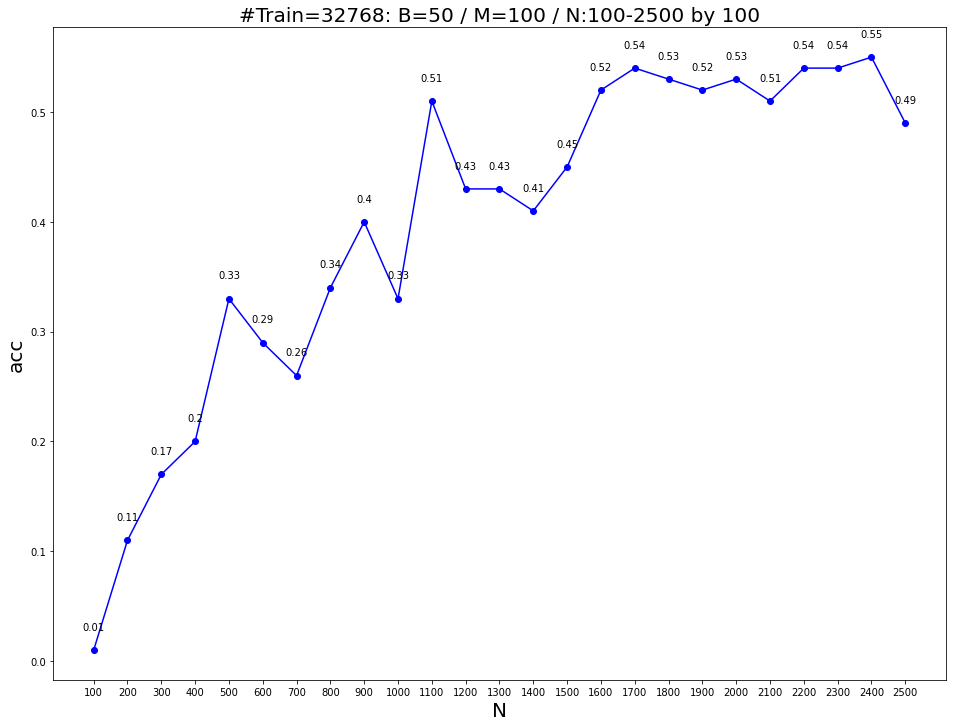

In [ ]:
rgs=set(range(200))
batch=50
acc_32768=[]
times_32768=[]
#Ns=list(range(100,2501,100))
for N in range(100,2501,100):
    start = time.time()
    generated_data = []
    N_batch=int(N/batch)
    print(N_batch)
    for i in range(N_batch):
        z= torch.randn((batch, 100, 1, 1) , device = device)
        with torch.no_grad():
            img = g_32768(z)
        generated_data.append(img)
    mini_eps = []
    for t in range(M):
        with torch.no_grad():
            mini_eps.append(minimum_distance(train_img[t].cpu()).min())
            mini_eps.append(minimum_distance(non_train_img[t].cpu()).min())
    mini_eps_tensor = torch.stack(mini_eps)
    epsilon = torch.median(mini_eps_tensor)
    print(epsilon)
    nbds = []
    nbds_train=[]
    nbds_non_train=[]
    for i in range(M):
        neighbors = 0

        for k in range(N_batch):
            if distance(train_img[i].cpu(),generated_data[0][k].cpu()) <= epsilon:
                neighbors += 1
        nbds.append(neighbors)
        nbds_train.append(neighbors)
    for l in range(M):
        nt_neighbors = 0
        for j in range(N_batch):
            if distance(non_train_img[l].cpu(),generated_data[0][j].cpu()) <= epsilon:
                nt_neighbors +=1
        nbds.append(nt_neighbors)
        nbds_non_train.append(nt_neighbors)
    nbds_tensor=torch.tensor(nbds)
    max_values, max_indices=torch.topk(nbds_tensor, k=M)
    max_nbds=[nbds_tensor[index] for index in max_indices]
    max_nbds=torch.stack(max_nbds)
    print(max_nbds)
    # TP, 즉 max_indices(참이라고 예측) 중에서 실제로 index가 M 미만(참)인 것들.
    TP=0
    for index in max_indices:
        if index<M:
            TP+=1
    ## 여기서부터 recall 계산
    max_ind_list=[]
    #for i in range(100):
    #    max_ind_list.append(max_indices[i].item())
    #non_max_idx=list(rgs-set(max_ind_list))
    accuracy=TP/M
    print('TP: {0}'.format(TP))
    acc_32768.append(accuracy)
    #Ns.append(N)
    print(N/100)
    end = time.time()
    print(f"{end - start:.5f} sec")
    times_32768.append(end - start)
print(acc_32768)
print(times_32768)
plt.figure(figsize = (16,12))
plt.title("#Train=32768: B=50 / M=100 / N:100-2500 by 100", fontsize = 20)
plt.plot(Ns, acc_32768,'bo-')
plt.xlabel("N", fontsize = 20)
plt.ylabel("acc", fontsize = 20)
plt.xticks(Ns,fontsize = 10)
plt.yticks(fontsize = 10)
    #label = "{:.2f}".format(y) # y좌표를 소수점 이하 2자리까지를 문자열로 만듬.
# xs와 ys로부터 하나씩 가져와서 묶은 후, 각각 x,y에 전달합니다.
for x,y in zip(Ns,acc_32768):


    plt.annotate(y, # 출력할 텍스트, 여기에선 y좌표
                (x,y), # 텍스트를 출력할 좌표
                textcoords="offset points", # 텍스트 위치를 (x,y)로 부터의 오프셋 (offset_x, offset_y)로 지정
                xytext=(0, 20), # (x, y)로 부터의 오프셋 (offset_x, offset_y), 여기에선 y 좌표로 +20 이동합니다.
                ha='center') # 수평방향으로 중앙정렬합니다.

# 화면에 출력합니다.
plt.show()


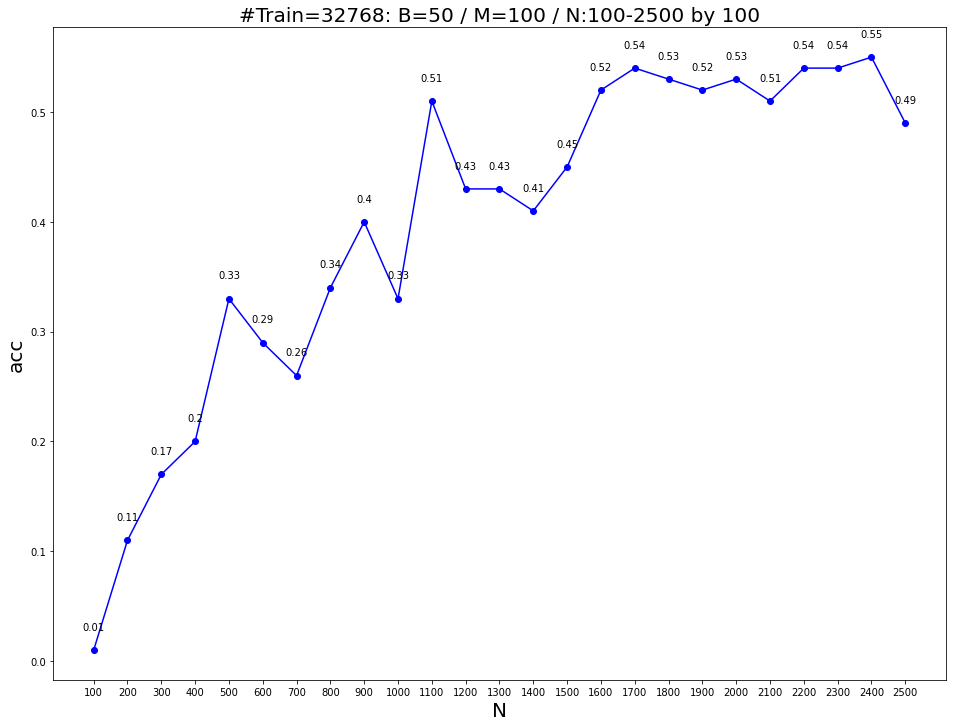

In [ ]:
acc_32768=[0.01, 0.11, 0.17, 0.2, 0.33, 0.29, 0.26, 0.34, 0.4, 0.33, 0.51, 0.43, 0.43, 0.41, 0.45, 0.52, 0.54, 0.53, 0.52, 0.53, 0.51, 0.54, 0.54, 0.55, 0.49]
plt.figure(figsize = (16,12))
plt.title("#Train=32768: B=50 / M=100 / N:100-2500 by 100", fontsize = 20)
plt.plot(Ns, acc_32768,'bo-')
plt.xlabel("N", fontsize = 20)
plt.ylabel("acc", fontsize = 20)
plt.xticks(Ns,fontsize = 10)
plt.yticks(fontsize = 10)
    #label = "{:.2f}".format(y) # y좌표를 소수점 이하 2자리까지를 문자열로 만듬.
# xs와 ys로부터 하나씩 가져와서 묶은 후, 각각 x,y에 전달합니다.
for x,y in zip(Ns,acc_32768):


    plt.annotate(y, # 출력할 텍스트, 여기에선 y좌표
                (x,y), # 텍스트를 출력할 좌표
                textcoords="offset points", # 텍스트 위치를 (x,y)로 부터의 오프셋 (offset_x, offset_y)로 지정
                xytext=(0, 20), # (x, y)로 부터의 오프셋 (offset_x, offset_y), 여기에선 y 좌표로 +20 이동합니다.
                ha='center') # 수평방향으로 중앙정렬합니다.

# 화면에 출력합니다.
plt.show()


# 8192 / 16384 / 32768에 대한 소요 시간 출력

[68.42321538925171, 84.73396754264832, 94.99955677986145, 97.68092060089111, 97.71988558769226, 106.82602262496948, 118.8573579788208, 136.8069407939911, 139.15709328651428, 154.23778820037842, 155.843190908432, 181.86930799484253, 167.656259059906, 174.36954021453857, 193.29310870170593, 189.4593505859375, 210.59200358390808, 216.08788108825684, 224.72532987594604, 236.22146654129028, 251.78737044334412, 858.1453242301941, 259.28245997428894, 266.62315821647644, 287.945919752121]


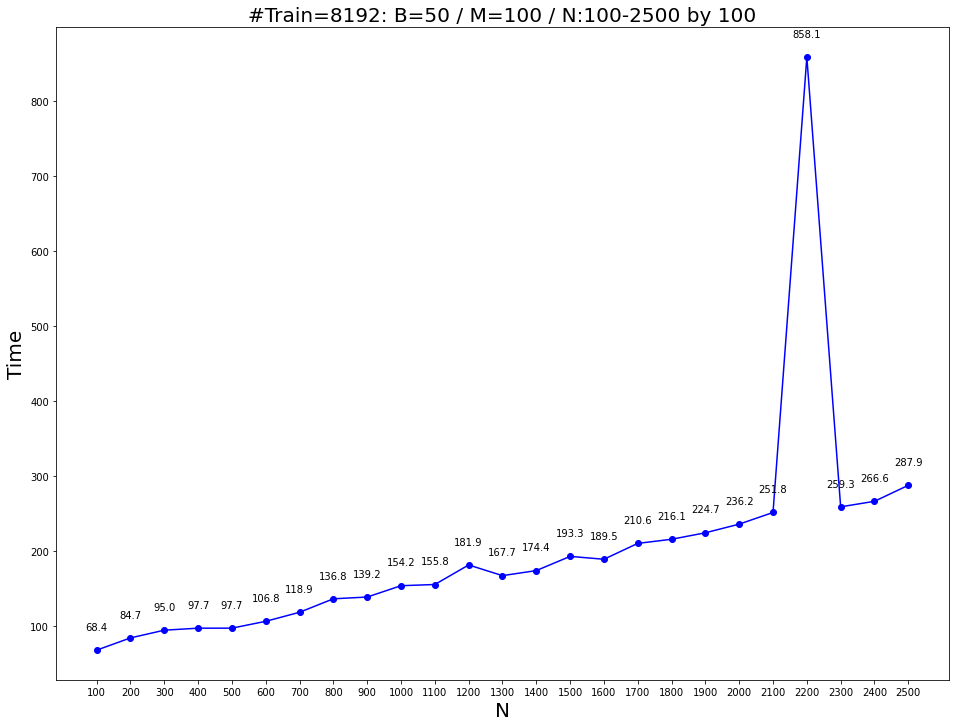

In [ ]:
times_8192=[68.42321538925171, 84.73396754264832, 94.99955677986145, 97.68092060089111, 97.71988558769226, 106.82602262496948, 118.8573579788208, 136.8069407939911, 139.15709328651428, 154.23778820037842, 155.843190908432, 181.86930799484253, 167.656259059906, 174.36954021453857, 193.29310870170593, 189.4593505859375, 210.59200358390808, 216.08788108825684, 224.72532987594604, 236.22146654129028, 251.78737044334412, 858.1453242301941, 259.28245997428894, 266.62315821647644, 287.945919752121]
times_16384=[82.9599962234497, 88.95378279685974, 87.45727133750916, 106.70530390739441, 102.67903804779053, 118.86918759346008, 123.02318453788757, 139.54490876197815, 132.51998591423035, 139.7839846611023, 148.8705472946167, 163.5362696647644, 185.23720145225525, 178.43506813049316, 193.64649868011475, 190.2205913066864, 201.81415486335754, 209.9221043586731, 219.0546202659607, 222.52416610717773, 233.03824138641357, 261.7891757488251, 261.6638867855072, 263.74810767173767, 261.17011761665344]
times_32768=[77.80275321006775, 80.72559070587158, 86.78321552276611, 98.20391011238098, 110.92174625396729, 118.41214060783386, 121.79568099975586, 137.32135105133057, 768.1982073783875, 157.437406539917, 162.10455632209778, 167.61182761192322, 176.94722938537598, 169.64502358436584, 194.8503692150116, 194.92328119277954, 198.6064293384552, 215.9065294265747, 230.18183302879333, 244.08186960220337, 240.17761063575745, 256.47691226005554, 259.4458339214325, 264.6479916572571, 279.7846872806549]
print(times_8192)
plt.figure(figsize = (16,12))
plt.title("#Train=8192: B=50 / M=100 / N:100-2500 by 100", fontsize = 20)
plt.plot(Ns, times_8192,'bo-')
plt.xlabel("N", fontsize = 20)
plt.ylabel("Time", fontsize = 20)
plt.xticks(Ns,fontsize = 10)
plt.yticks(fontsize = 10)
    #label = "{:.2f}".format(y) # y좌표를 소수점 이하 2자리까지를 문자열로 만듬.
# xs와 ys로부터 하나씩 가져와서 묶은 후, 각각 x,y에 전달합니다.
for x,y in zip(Ns,times_8192):
    label = "{:.1f}".format(y)

    plt.annotate(label, # 출력할 텍스트, 여기에선 y좌표
                (x,y), # 텍스트를 출력할 좌표
                textcoords="offset points", # 텍스트 위치를 (x,y)로 부터의 오프셋 (offset_x, offset_y)로 지정
                xytext=(0, 20), # (x, y)로 부터의 오프셋 (offset_x, offset_y), 여기에선 y 좌표로 +20 이동합니다.
                ha='center') # 수평방향으로 중앙정렬합니다.

# 화면에 출력합니다.
plt.show()

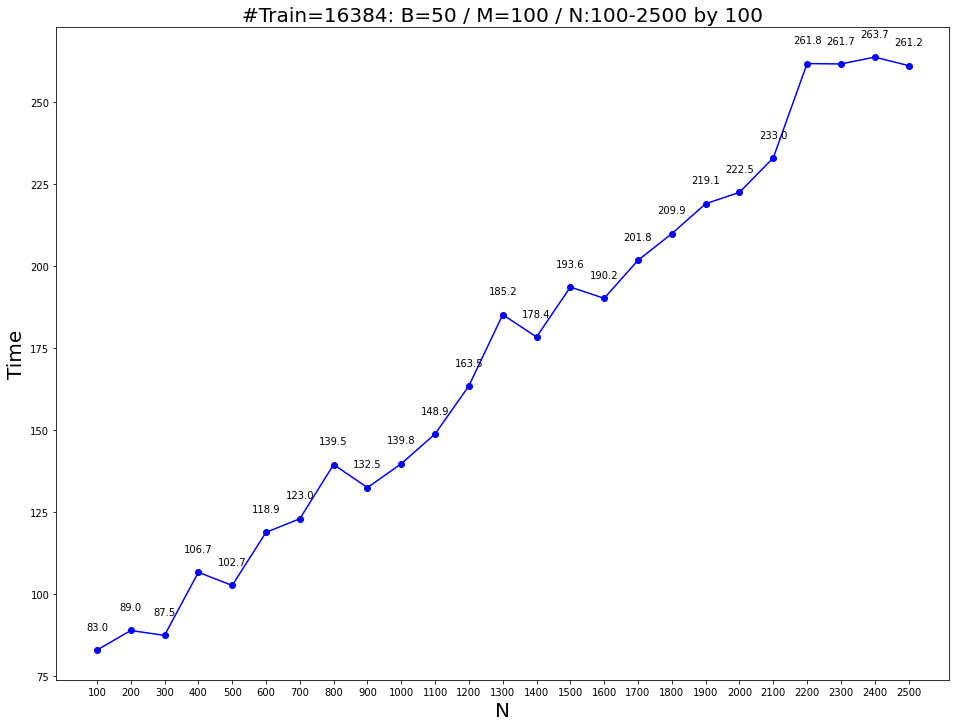

In [ ]:
plt.figure(figsize = (16,12))
plt.title("#Train=16384: B=50 / M=100 / N:100-2500 by 100", fontsize = 20)
plt.plot(Ns, times_16384,'bo-')
plt.xlabel("N", fontsize = 20)
plt.ylabel("Time", fontsize = 20)
plt.xticks(Ns,fontsize = 10)
plt.yticks(fontsize = 10)
    #label = "{:.2f}".format(y) # y좌표를 소수점 이하 2자리까지를 문자열로 만듬.
# xs와 ys로부터 하나씩 가져와서 묶은 후, 각각 x,y에 전달합니다.
for x,y in zip(Ns,times_16384):
    label = "{:.1f}".format(y)

    plt.annotate(label, # 출력할 텍스트, 여기에선 y좌표
                (x,y), # 텍스트를 출력할 좌표
                textcoords="offset points", # 텍스트 위치를 (x,y)로 부터의 오프셋 (offset_x, offset_y)로 지정
                xytext=(0, 20), # (x, y)로 부터의 오프셋 (offset_x, offset_y), 여기에선 y 좌표로 +20 이동합니다.
                ha='center') # 수평방향으로 중앙정렬합니다.

# 화면에 출력합니다.
plt.show()

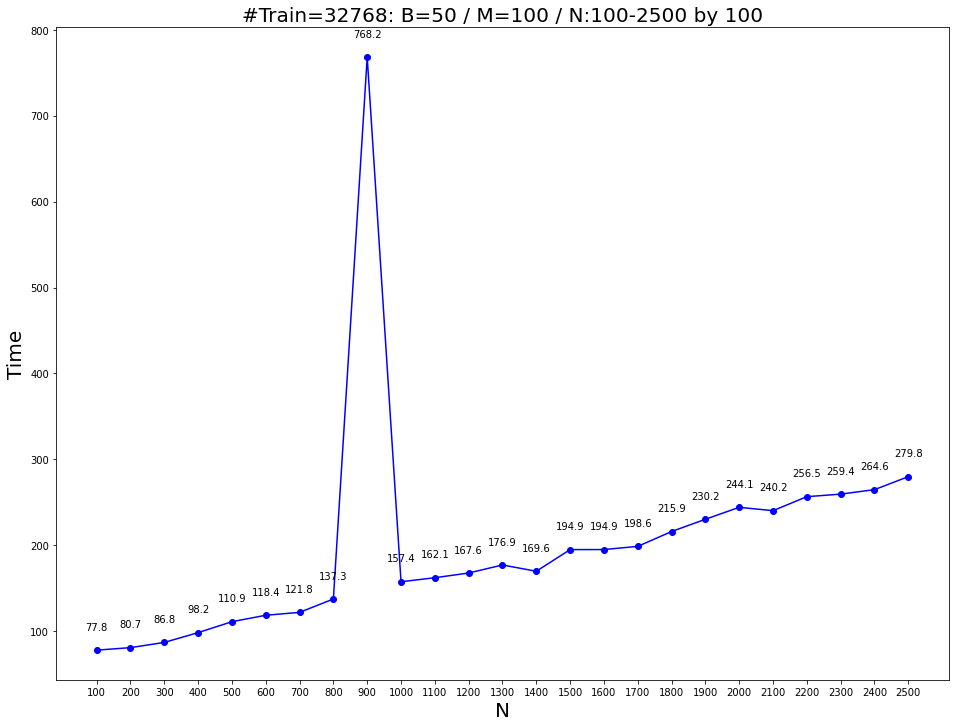

In [ ]:
plt.figure(figsize = (16,12))
plt.title("#Train=32768: B=50 / M=100 / N:100-2500 by 100", fontsize = 20)
plt.plot(Ns, times_32768,'bo-')
plt.xlabel("N", fontsize = 20)
plt.ylabel("Time", fontsize = 20)
plt.xticks(Ns,fontsize = 10)
plt.yticks(fontsize = 10)
    #label = "{:.2f}".format(y) # y좌표를 소수점 이하 2자리까지를 문자열로 만듬.
# xs와 ys로부터 하나씩 가져와서 묶은 후, 각각 x,y에 전달합니다.
for x,y in zip(Ns,times_32768):
    label = "{:.1f}".format(y)

    plt.annotate(label, # 출력할 텍스트, 여기에선 y좌표
                (x,y), # 텍스트를 출력할 좌표
                textcoords="offset points", # 텍스트 위치를 (x,y)로 부터의 오프셋 (offset_x, offset_y)로 지정
                xytext=(0, 20), # (x, y)로 부터의 오프셋 (offset_x, offset_y), 여기에선 y 좌표로 +20 이동합니다.
                ha='center') # 수평방향으로 중앙정렬합니다.

# 화면에 출력합니다.
plt.show()